# Data Design and Pandas Basics

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

sns.set()

## 1.Data Design

### 1.1 A prequel: when sampling fails

When sampling method fails: __Dewey Defeats Truman__

https://www.textbook.ds100.org/ch/02/design_dewey_truman.html

A 1936 poll predicted a landslide defeat for FDR. It turned out that even though the poll interviewed almost 2 million subjects, it was mostly conducted over phone, a relatively valuable possession at the time, and thus precluded a less wealthy mass, introducing selection bias into the sample.

 1948 Gallup used quota sampling to avoid this downfall. In their sampling scheme, each interviewer polled a set number of people from each demographic class. However the prediction was also askew: they predicted Thomas Dewey would earn 5% more of the popular vote than Harry Truman would. The result was the other way around: Truman won by more than 5%. 
 
What went wrong? Although quota sampling did help pollsters reduce sampling bias, it introduced bias in another way. The Gallup Poll told its interviewers that as long as they fulfilled their quotas __they could interview whomever they wished__. Here's one possible explanation for why the interviewers ended up polling a disproportionate number of Republicans: at the time, Republicans were on average wealthier and more likely to live in nicer neighborhoods, making them easier to interview. This observation is supported by the fact that the Gallup Poll predicted __2-6% more Republican votes__ than the actual results for the 3 elections prior.

We now rely on probability sampling, a family of sampling methods that assigns precise probabilities to the appearance of each sample, to reduce bias as much as possible in our data collection process.

### 1.2 Sampling techniques

Why is probabiliy sampling important? Only when we ascertain probabibility in sampling, do they admit the interpretation as a sample from a data generation process.

Three major techniques:

- __Simple Random Sampling__
- __Cluster Sampling__. divide the population into clusters, then pick one cluster at random. Easy to conduct: most polling agencies today use towns as clusters, and survey the town. 
- __Stratifed Sampling__. divide the popluation into strata, then produce a randome sample out of each strata. Ensures a proper representation of the population. The proper strata size isn't always knowable.

### 1.3 SRS vs "Big Data"

Estimates based on large datasets tend to be less biased, but when the sampling pool is itself a biased represetation of the population, the that accuracy becomes a source of error. See the simualation for SRS vs Big data for 2012 poll.

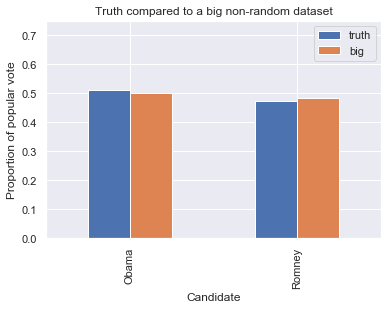

In [11]:
# HIDDEN
total = 129085410
obama_true_count = 65915795
romney_true_count = 60933504
obama_true = obama_true_count / total
romney_true = romney_true_count / total

# 1 percent off
obama_big = obama_true - 0.01
romney_big = romney_true + 0.01

# HIDDEN
pd.DataFrame({
    'truth': [obama_true, romney_true],
    'big': [obama_big, romney_big],
}, index=['Obama', 'Romney'], columns=['truth', 'big']).plot.bar()
plt.title('Truth compared to a big non-random dataset')
plt.xlabel('Candidate')
plt.ylabel('Proportion of popular vote')
plt.ylim(0, 0.75);

C:\Users\nleea\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':
C:\Users\nleea\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  del sys.path[0]


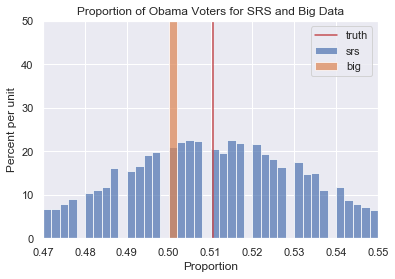

In [15]:
srs_size = 400
big_size = 60000000
replications = 10000

def resample(size, prop, replications):
    return np.random.binomial(n=size, p=prop, size=replications) / size

srs_simulations = resample(srs_size, obama_true, replications)
big_simulations = resample(big_size, obama_big, replications)

bins = bins=np.arange(0.47, 0.55, 0.002)
plt.hist(srs_simulations, bins=bins, alpha=0.7, normed=True, label='srs')
plt.hist(big_simulations, bins=bins, alpha=0.7, normed=True, label='big')

plt.title('Proportion of Obama Voters for SRS and Big Data')
plt.xlabel('Proportion')
plt.ylabel('Percent per unit')
plt.xlim(0.47, 0.55)
plt.ylim(0, 50)
plt.axvline(x=obama_true, color='r', label='truth')
plt.legend();

__Takeaways__ 

Before accepting the results of a data analysis, it pays to carefully inspect the quality of the data. In particular, we must ask the following questions:

1. __Is the data a census__ (does it include the entire population of interest)? If so, we can just compute properties of the population directly without having to use inference.
2. __If the data is a sample__, how was the sample collected? To properly conduct inference, the sample should have been collected according to a _completely described probability sampling method_.
3. What changes were made to the data before producing results? Do any of these changes affect the quality of the data?

## 2. Data Structure and Pandas Basics

### 2.1 Before reading in data

In most situations we read data stored in __disk storage__ into __RAM__. On my laptop, the RAM is about 8GB, and the disk is much larger. We need to determine whether it's safe to read the data into RAM before naively invoking read_csv.

In python use the following commands to check the size of documents and folders. _!_ sends the command directly into intepreter shell.

As a rule of thumb, a pandas dataframe typically requires twice the size of a data file in RAM.

In [21]:
## Showing file sizes and creation time.
!ls -alh

total 7.2M
drwxr-xr-x 1 nleea 197609    0 Nov 30 02:25 .
drwxr-xr-x 1 nleea 197609    0 Nov 29 17:36 ..
drwxr-xr-x 1 nleea 197609    0 Nov 29 17:42 .ipynb_checkpoints
-rw-r--r-- 1 nleea 197609 6.9M Nov 29 16:42 babynames.zip
-rw-r--r-- 1 nleea 197609  45K Nov 30 02:25 DataDesign&PandasBasic.ipynb
-rw-r--r-- 1 nleea 197609 179K Nov 29 23:26 DataScience_LifeCycleOverview.ipynb
7.3M	.


In [24]:
## -h shows the size of current folder, and all the folders contained in the current folder.
!du -h

208K	./.ipynb_checkpoints
7.3M	.


### 2.2 Indexes, slicing and sorting

In [33]:
baby = pd.read_csv("babynames.csv")
baby = baby.drop(["Unnamed: 0"], axis=1)

__What were the five most popular baby names in 2016?__

In [58]:
baby_2016 = baby[baby["Year"] == 2016].loc[:, ["Name", "Count"]]
baby_2016

,Name,Count
1859413,Emma,19496
1859414,Olivia,19365
1859415,Ava,16302
1859416,Sophia,16128
1859417,Isabella,14795
...,...,...
1892418,Zolton,5
1892419,Zurich,5
1892420,Zyahir,5
1892421,Zyel,5


__What were the most popular male and female names in each year?__

In [97]:
baby = baby.sort_values("Count", ascending=False)
baby

def most_popular(series):
    return series.iloc[0]

# Each groupby object is a tuple, not a dataframe.
baby_groupby = baby.groupby(["Year", "Sex"])
for group in baby_groupby:
    group.iloc[0]


,Name,Sex,Count,Year
431066,Linda,F,99689,1947
441437,Linda,F,96211,1948
437169,James,M,94757,1947
544630,Michael,M,92704,1957
437170,Robert,M,91640,1947
...,...,...,...,...
1349724,Perlita,F,5,2000
1349723,Peony,F,5,2000
1349722,Penda,F,5,2000
1349721,Patzy,F,5,2000


AttributeError: 'tuple' object has no attribute 'iloc'

In [87]:

baby.groupby(["Year", "Sex"]).agg(most_popular)
baby.groupby(["Year", "Sex"]).first()

Name  Count
Year Sex             
1880 F    Mary   7065
     M    John   9655
1881 F    Mary   6919
     M    John   8769
1882 F    Mary   8148
...        ...    ...
2016 M    Noah  19117
2017 F    Emma  19800
     M    Liam  18798
2018 F    Emma  18688
     M    Liam  19837

[278 rows x 2 columns]

In [90]:

# baby.groupby(["Year", "Sex"]).get_group((2018,"F"))




((1880, 'F'),           Name Sex  Count  Year
0         Mary   F   7065  1880
1         Anna   F   2604  1880
2         Emma   F   2003  1880
3    Elizabeth   F   1939  1880
4       Minnie   F   1746  1880
..         ...  ..    ...   ...
919     Rennie   F      5  1880
917     Pinkey   F      5  1880
835     Adelle   F      5  1880
891     Lorene   F      5  1880
889     Littie   F      5  1880

[942 rows x 4 columns])
((1880, 'M'),            Name Sex  Count  Year
942        John   M   9655  1880
943     William   M   9532  1880
944       James   M   5927  1880
945     Charles   M   5348  1880
946      George   M   5126  1880
...         ...  ..    ...   ...
1998       York   M      5  1880
1994       Wood   M      5  1880
1992        Wes   M      5  1880
1961  Nathanial   M      5  1880
1959     Myrtle   M      5  1880

[1058 rows x 4 columns])
((1881, 'F'),            Name Sex  Count  Year
2000       Mary   F   6919  1881
2001       Anna   F   2698  1881
2002       Emma   F   2034  

[1395 rows x 4 columns])
((1905, 'F'),            Name Sex  Count  Year
69459      Mary   F  16067  1905
69460     Helen   F   6811  1905
69461  Margaret   F   5690  1905
69462      Anna   F   5424  1905
69463      Ruth   F   5068  1905
...         ...  ..    ...   ...
71504   Fabiola   F      5  1905
71506   Felicie   F      5  1905
71507     Felma   F      5  1905
71508     Flara   F      5  1905
71509    Forest   F      5  1905

[2234 rows x 4 columns])
((1905, 'M'),             Name Sex  Count  Year
71693       John   M   8060  1905
71694    William   M   6495  1905
71695      James   M   6042  1905
71696     George   M   4256  1905
71697    Charles   M   3608  1905
...          ...  ..    ...   ...
72930      Alven   M      5  1905
72931   Ambrosio   M      5  1905
72932    Americo   M      5  1905
72933      Amiel   M      5  1905
72934  Arlington   M      5  1905

[1421 rows x 4 columns])
((1906, 'F'),            Name Sex  Count  Year
73114      Mary   F  16370  1906
73115     H

[5899 rows x 4 columns])
((1924, 'M'),            Name Sex  Count  Year
218364   Robert   M  60801  1924
218365     John   M  59055  1924
218366  William   M  53511  1924
218367    James   M  52939  1924
218368  Charles   M  30461  1924
...         ...  ..    ...   ...
222726   Alfard   M      5  1924
222731    Alvar   M      5  1924
222714  Abundio   M      5  1924
222718   Adrion   M      5  1924
222717    Adlai   M      5  1924

[4970 rows x 4 columns])
((1925, 'F'),             Name Sex  Count  Year
223334      Mary   F  70591  1925
223335   Dorothy   F  38570  1925
223336     Betty   F  32813  1925
223337     Helen   F  29172  1925
223338  Margaret   F  24463  1925
...          ...  ..    ...   ...
229095     Xenia   F      5  1925
229094   Wynetta   F      5  1925
229093     Wylda   F      5  1925
229092    Woodie   F      5  1925
229091   Winston   F      5  1925

[5771 rows x 4 columns])
((1925, 'M'),            Name Sex  Count  Year
229105   Robert   M  60897  1925
229106     

[5244 rows x 4 columns])
((1944, 'M'),              Name Sex  Count  Year
408428      James   M  76951  1944
408429     Robert   M  70843  1944
408430       John   M  66610  1944
408431    William   M  52369  1944
408432    Richard   M  45642  1944
...           ...  ..    ...   ...
412141   Levander   M      5  1944
412142      Levis   M      5  1944
412146    Londell   M      5  1944
412001  Elisandro   M      5  1944
412006       Elvy   M      5  1944

[3908 rows x 4 columns])
((1945, 'F'),             Name Sex  Count  Year
412336      Mary   F  59283  1945
412337     Linda   F  41462  1945
412338   Barbara   F  38276  1945
412339  Patricia   F  35839  1945
412340     Carol   F  30387  1945
...          ...  ..    ...   ...
417536  Verletta   F      5  1945
417537    Vernal   F      5  1945
417541    Versia   F      5  1945
417545    Vinita   F      5  1945
417574   Zenaida   F      5  1945

[5241 rows x 4 columns])
((1945, 'M'),            Name Sex  Count  Year
417577    James   M 

((1968, 'M'),              Name Sex  Count  Year
678156    Michael   M  82008  1968
678157      David   M  63718  1968
678158       John   M  60929  1968
678159      James   M  60693  1968
678160     Robert   M  58211  1968
...           ...  ..    ...   ...
682528      Herod   M      5  1968
682529     Herron   M      5  1968
682530  Herschell   M      5  1968
682531     Hervey   M      5  1968
682567      Jerzy   M      5  1968

[4742 rows x 4 columns])
((1969, 'F'),             Name Sex  Count  Year
682898      Lisa   F  45029  1969
682899  Michelle   F  34322  1969
682900  Jennifer   F  33702  1969
682901  Kimberly   F  33077  1969
682902   Melissa   F  23020  1969
...          ...  ..    ...   ...
691369   Shenise   F      5  1969
691367  Shellisa   F      5  1969
691296  Rosamond   F      5  1969
691302    Roshun   F      5  1969
691299  Roselynn   F      5  1969

[8708 rows x 4 columns])
((1969, 'M'),            Name Sex  Count  Year
691606  Michael   M  85203  1969
691607    Da

((1990, 'M'),                 Name Sex  Count  Year
1084900      Michael   M  65290  1990
1084901  Christopher   M  52336  1990
1084902      Matthew   M  44804  1990
1084903       Joshua   M  43219  1990
1084904       Daniel   M  33818  1990
...              ...  ..    ...   ...
1094276      Trandon   M      5  1990
1094277       Trauis   M      5  1990
1094217       Stavon   M      5  1990
1094218      Steffin   M      5  1990
1094219       Stehen   M      5  1990

[9484 rows x 4 columns])
((1991, 'F'),               Name Sex  Count  Year
1094384     Ashley   F  43478  1991
1094385    Jessica   F  43398  1991
1094386   Brittany   F  29089  1991
1094387     Amanda   F  28893  1991
1094388   Samantha   F  25645  1991
...            ...  ..    ...   ...
1109663    Tikesha   F      5  1991
1109664     Tikyra   F      5  1991
1109643    Thressa   F      5  1991
1109641  Thomasena   F      5  1991
1109618      Teaya   F      5  1991

[15462 rows x 4 columns])
((1991, 'M'),                 N

[19509 rows x 4 columns])
((2012, 'M'),             Name Sex  Count  Year
1745529    Jacob   M  19074  2012
1745530    Mason   M  18969  2012
1745531    Ethan   M  17672  2012
1745532     Noah   M  17353  2012
1745533  William   M  16885  2012
...          ...  ..    ...   ...
1759175   Nubaid   M      5  2012
1759204   Ovidio   M      5  2012
1759206    Owenn   M      5  2012
1759207    Owynn   M      5  2012
1759143    Nedim   M      5  2012

[14238 rows x 4 columns])
((2013, 'F'),              Name Sex  Count  Year
1759767    Sophia   F  21223  2013
1759768      Emma   F  20942  2013
1759769    Olivia   F  18428  2013
1759770  Isabella   F  17642  2013
1759771       Ava   F  15252  2013
...           ...  ..    ...   ...
1777938  Lucrecia   F      5  2013
1777927   Loganne   F      5  2013
1777928    Lohgan   F      5  2013
1776813  Cataleia   F      5  2013
1776405    Alayne   F      5  2013

[19241 rows x 4 columns])
((2013, 'M'),             Name Sex  Count  Year
1779008     Noah